In [ ]:

# Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# Choose your installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda11 

!pip install sahi==0.10.8
!pip install -U pillow

--2022-11-20 03:54:23--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2820 (2.8K) [text/plain]
Saving to: ‘icevision_install.sh’

icevision_install.s 100%[===================>]   2.75K  --.-KB/s    in 0s      

2022-11-20 03:54:23 (49.4 MB/s) - ‘icevision_install.sh’ saved [2820/2820]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.3 MB/s eta 0:16:31tcmalloc: large alloc 1147494400 bytes == 0x38d20000 @  0x7f7cefcbf615 0x

In [ ]:
# Restart kernel after installation
import IPython
IPython.Application.instance().kernel.do_shutdown(True)


{'status': 'ok', 'restart': True}

In [ ]:
from icevision.all import *
from icevision.models import *


INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

In [ ]:
!gdown 1tw60FlqWazZfqghWsSi4DRJAIZq77RLa

Downloading...
From: https://drive.google.com/uc?id=1tw60FlqWazZfqghWsSi4DRJAIZq77RLa
To: /content/vehicle_icevision_vfnet_full.pth
100% 131M/131M [00:06<00:00, 20.0MB/s]


In [ ]:
checkpoint_path = 'vehicle_icevision_vfnet_full.pth'
checkpoint_and_model = model_from_checkpoint(checkpoint_path)


In [ ]:

# Just logging the info
model_type = checkpoint_and_model["model_type"]
backbone = checkpoint_and_model["backbone"]
class_map = checkpoint_and_model["class_map"]
img_size = 384
model_type, backbone, class_map, img_size


(<module 'icevision.models.mmdet.models.vfnet' from '/usr/local/lib/python3.7/dist-packages/icevision/models/mmdet/models/vfnet/__init__.py'>,
 <ClassMap: {'background': 0, 'vehicle': 1}>,
 384)

In [ ]:
# Model
model = checkpoint_and_model["model"]


In [ ]:
# Transforms
img_size = 384
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])


In [ ]:
import PIL, requests
def image_from_url(url):
    res = requests.get(url, stream=True)
    img = PIL.Image.open(res.raw)
    return np.array(img)

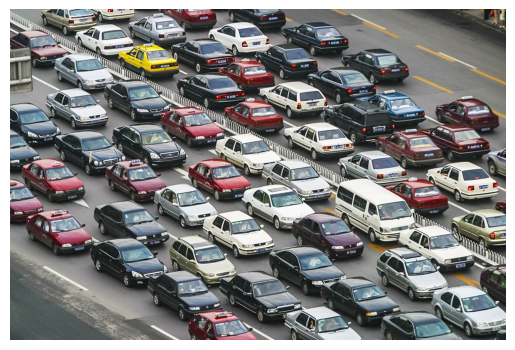

In [ ]:
image_url = "https://media.wired.com/photos/593256b42a990b06268a9e21/master/pass/traffic-jam-getty.jpg"
img = image_from_url(image_url)
show_img(img);

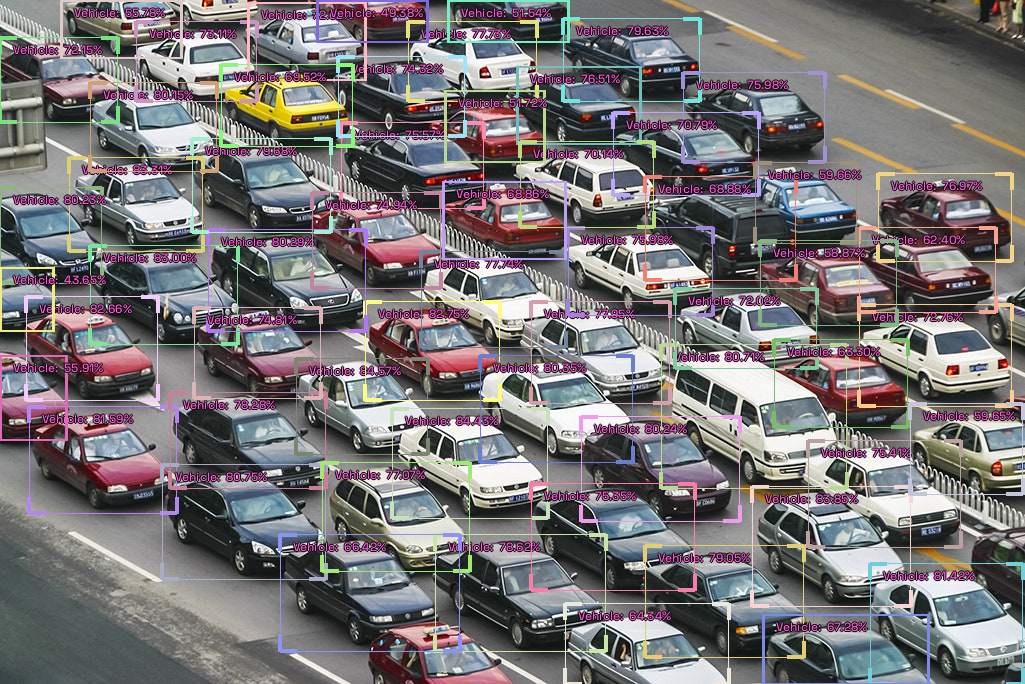

In [ ]:
res = requests.get(image_url, stream=True)
img = PIL.Image.open(res.raw)

pred_dict  = model_type.end2end_detect(img, valid_tfms, model, class_map=class_map, detection_threshold=0.4)
pred_dict['img']

In [ ]:
print('number of vehicles in img',len(pred_dict['detection']['labels']))

number of vehicles in img 59


In [ ]:
from icevision.models.inference_sahi import IceSahiModel

In [ ]:
sahimodel = IceSahiModel(model_type=model_type, model=model, class_map=class_map, tfms=valid_tfms, confidence_threshold=0.4)

In [ ]:
pred = sahimodel.get_sliced_prediction(
                img,
                keep_sahi_format=False,
                return_img=True,
                slice_height = 128,
                slice_width = 128,
                overlap_height_ratio = 0.2,
                overlap_width_ratio = 0.2,
            )

Performing prediction on 70 number of slices.


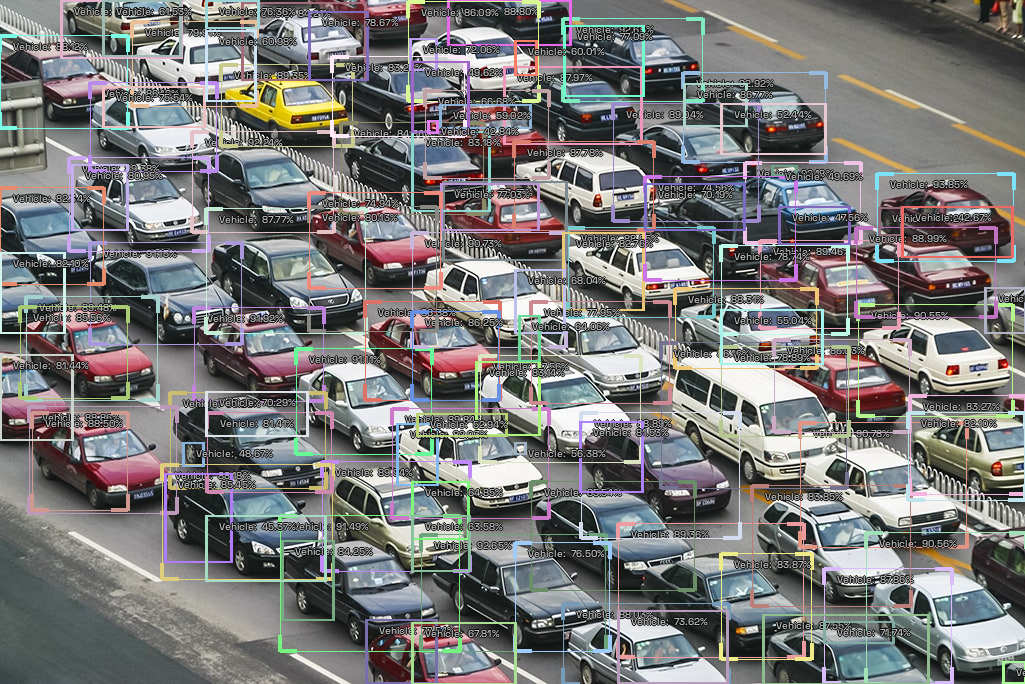

In [ ]:
pred["img"]